In [1]:
import sys

import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import cell
import imp
from cell import Celltype_utils, utils, graph_utils

imp.reload(math_utils)
imp.reload(cell)
imp.reload(utils)
imp.reload(Celltype_utils)
imp.reload(graph_utils)

In [4]:
parent_project_dir = "/home/pogo/work_dir/GNN/"
project_dir = parent_project_dir + "/ohmnet"
dat_dir = parent_project_dir + "/dat/"

In [5]:
ref_df = pd.read_csv("/home/pogo/work_dir/GNN/dat/NPP_channels_df.csv", index_col="Unnamed: 0")
ref_df.head()

,channel_id,channel,channel_color
0,1,Adcyap1-Adcyap1r1,#DA808C
1,2,Adcyap1-Vipr1,#FF0000
2,3,Adcyap1-Vipr2,#00FF66
3,4,Cck-Cckbr,#D3408D
4,5,Cort-Sstr1,#B864CC


In [ ]:
Interactions_VISp = {}
Interactions_ALM = {}

#for regions in ["VISp", "ALM"]:
for regions in ["VISp"]:
    for c in ref_df['channel']:
        name = c + "_" + regions
        if regions == "VISp":
            Interactions_VISp[name] = pd.read_excel(dat_dir + "/Interaction_VISp.xlsx", sheet_name= name, header = None)
        else:
            Interactions_ALM[name] = pd.read_excel(dat_dir + "/Interaction_ALM.xlsx", sheet_name= name, header = None)
        

In [50]:
#for k,v in Interactions_ALM.items():
#    max_val = np.max(np.max(v))
#    Interactions_ALM[k] = v/max_val

In [51]:
Interactions_VISp.keys()

dict_keys(['Adcyap1-Adcyap1r1_VISp', 'Adcyap1-Vipr1_VISp', 'Adcyap1-Vipr2_VISp', 'Cck-Cckbr_VISp', 'Cort-Sstr1_VISp', 'Cort-Sstr2_VISp', 'Cort-Sstr3_VISp', 'Cort-Sstr4_VISp', 'Crh-Crhr1_VISp', 'Crh-Crhr2_VISp', 'Grp-Grpr_VISp', 'Nmb-Nmbr_VISp', 'Npy-Npy1r_VISp', 'Npy-Npy2r_VISp', 'Npy-Npy5r_VISp', 'Nts-Ntsr1_VISp', 'Nts-Ntsr2_VISp', 'Pdyn-Oprd1_VISp', 'Pdyn-Oprk1_VISp', 'Pdyn-Oprm1_VISp', 'Penk-Oprd1_VISp', 'Penk-Oprm1_VISp', 'Pnoc-Oprl1_VISp', 'Pthlh-Pth1r_VISp', 'Rln1-Rxfp1_VISp', 'Rln1-Rxfp2_VISp', 'Rln1-Rxfp3_VISp', 'Sst-Sstr1_VISp', 'Sst-Sstr2_VISp', 'Sst-Sstr3_VISp', 'Sst-Sstr4_VISp', 'Tac1-Tacr1_VISp', 'Tac2-Tacr3_VISp', 'Trh-Trhr_VISp', 'Trh-Trhr2_VISp', 'Vip-Vipr1_VISp', 'Vip-Vipr2_VISp'])

In [133]:
data = pd.DataFrame()
for k,v in Interactions_VISp.items():
    v = v.stack().reset_index()
    v["label"] = k.split("_")[0]
    v.columns = ["node1", "node2", "weight", "channel"]
    data = data.append(pd.DataFrame(v), ignore_index=True)

In [134]:
data = data.merge(ref_df, on="channel")
data = data[["channel_id", "node1", "node2","weight", "channel", "channel_color"]]
#data = data[data['weight']>0.]
data['node1'] = data['node1'] + 1
data['node2'] = data['node2'] + 1

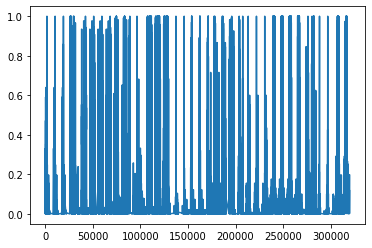

In [135]:
plt.plot(data.weight)

In [138]:
data.to_csv("/home/pogo/work_dir/GNN/NPP_MNE/data/NPP_multiplex.edges", header= None, sep=" ", index=False)

In [139]:
tmp = pd.read_csv("/home/pogo/work_dir/GNN/NPP_MNE/data/NPP_multiplex.edges", header=None, sep = " ")

In [162]:
data['edge'] = list(zip(data.node1, data.node2))
len(np.unique(data[data['channel_id']==1]['edge'])

2697

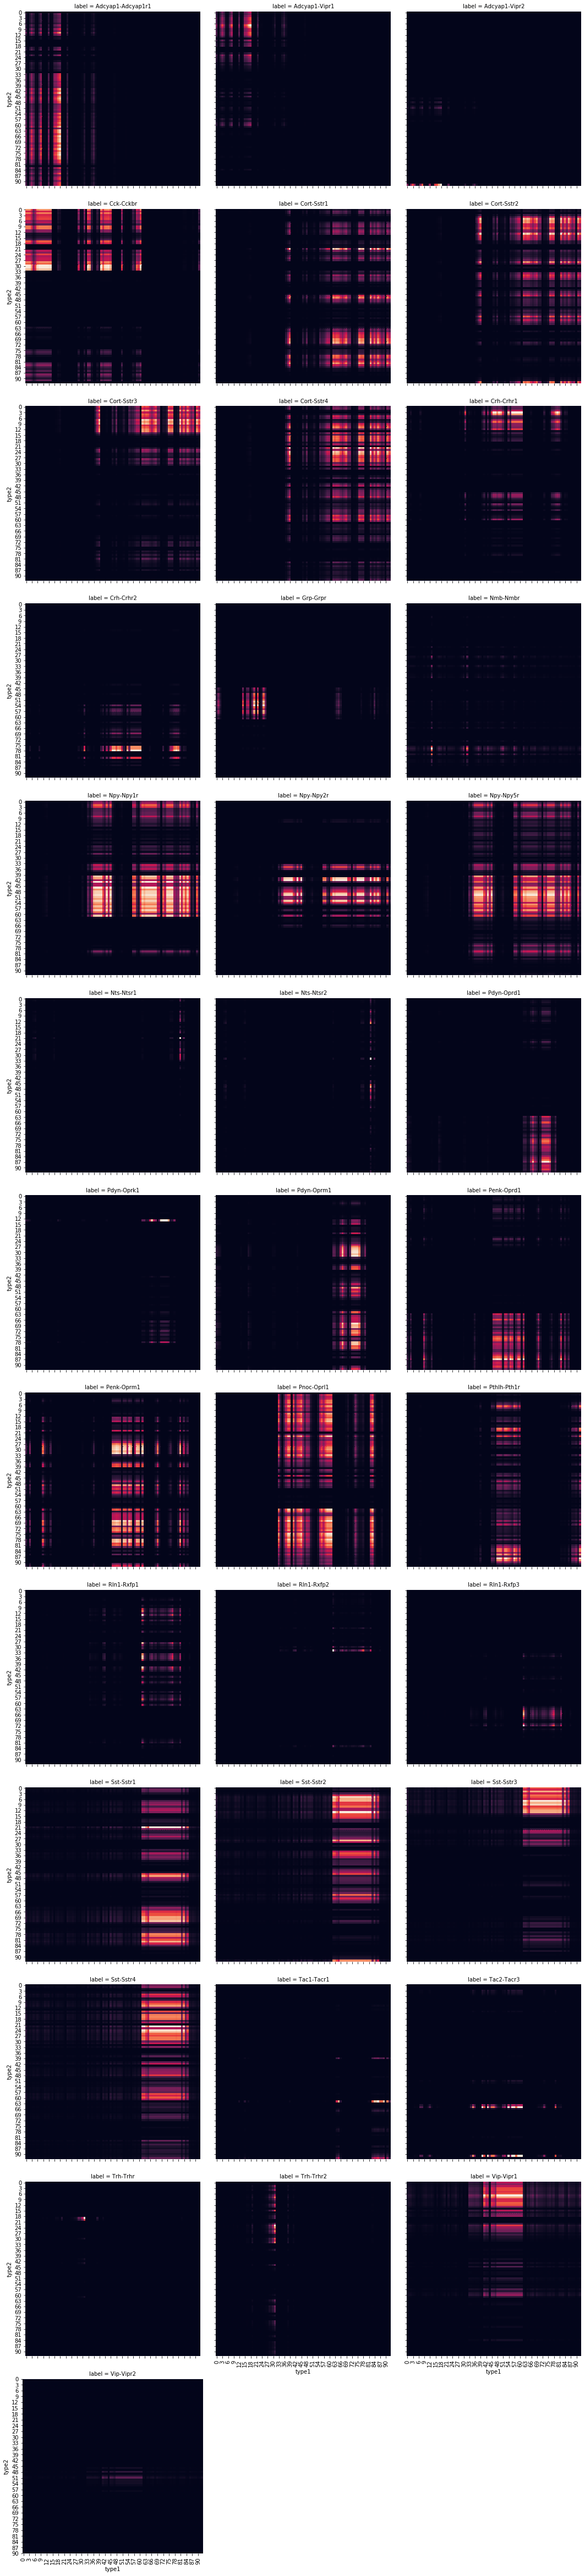

In [104]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs)

fg = sns.FacetGrid(data, col='label', col_wrap = 3, height= 5)
fg.map_dataframe(draw_heatmap, 'node1', 'node2', 'weight', cbar=False, square = True)

# get figure background color
facecolor=plt.gcf().get_facecolor()
for ax in fg.axes.flat:
    ax.set_aspect('equal','box')
plt.show()

### Compute the ucleadian distance between each pair of matrices

In [74]:
VISp_channel_dist = pd.DataFrame(columns=["NPP1", "NPP2", "dist"])

for k1, v1 in Interactions_VISp.items():
    for k2, v2 in Interactions_VISp.items():
        dist = np.sum(np.sum(np.sqrt(np.power((v1-v2), 2))))
        newline = {"NPP1": [k1], "NPP2": [k2], "dist": [dist]}
        VISp_channel_dist = VISp_channel_dist.append(pd.DataFrame(newline), ignore_index=True)

In [84]:
max_val = np.max(VISp_channel_dist['dist'])
VISp_channel_dist['dist'] = VISp_channel_dist['dist']/max_val

In [85]:
VISp_channel_dist.head()

,NPP1,NPP2,dist
0,Adcyap1-Adcyap1r1_VISp,Adcyap1-Adcyap1r1_VISp,0.000000
1,Adcyap1-Adcyap1r1_VISp,Adcyap1-Vipr1_VISp,0.227809
2,Adcyap1-Adcyap1r1_VISp,Adcyap1-Vipr2_VISp,0.227131
3,Adcyap1-Adcyap1r1_VISp,Cck-Cckbr_VISp,0.517586
4,Adcyap1-Adcyap1r1_VISp,Cort-Sstr1_VISp,0.550988


In [86]:
d = VISp_channel_dist.pivot(index= "NPP2", columns= "NPP1", values= "dist")

<Figure size 1440x1440 with 0 Axes>

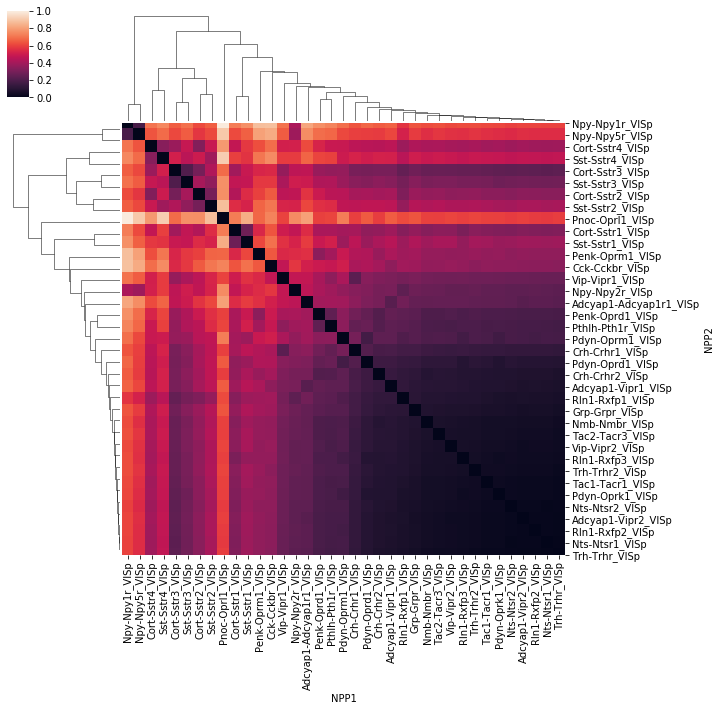

In [87]:
plt.figure(figsize=(20,20))
LL = linkage(ssd.squareform(d), method='ward',  metric="euclidean")
sns.clustermap(d, row_linkage=LL, col_linkage=LL)
#sns.clustermap(d, method="ward", metric="euclidean")

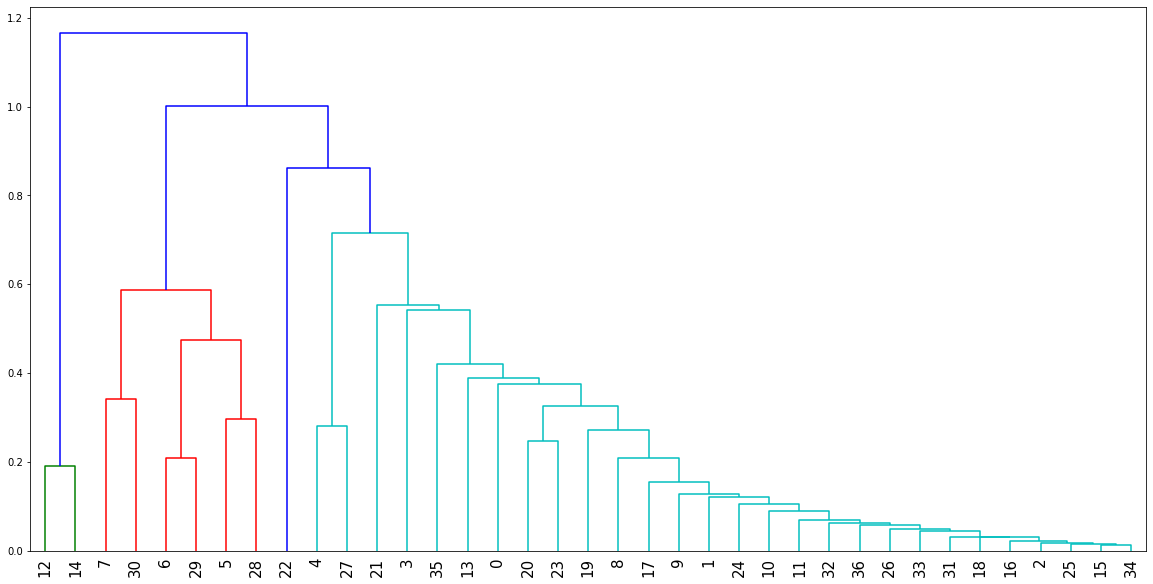

In [91]:
plt.figure(figsize=(20,10))
dn = dendrogram(LL,leaf_rotation=90,leaf_font_size=15)

In [92]:
node_labels = d.index.tolist()

In [96]:
from scipy.cluster import hierarchy
rootnode, nodelist = hierarchy.to_tree(LL, rd=True)

In [97]:
def Get_node(node):
    if all(v is not None for v in [node.left, node.right]):
        return node.id, node.left.id, node.right.id
    else:
        return None
    

output_hierarchy = pd.DataFrame(columns=["parent", "child"])

for n in nodelist:
    if Get_node(n) is not None:
        parent, right_child, left_child = Get_node(n)
        newline = {"parent": [parent], "child": [right_child]}
        output_hierarchy = output_hierarchy.append(pd.DataFrame(newline), ignore_index=True)
        newline = {"parent": [parent], "child": [left_child]}
        output_hierarchy = output_hierarchy.append(pd.DataFrame(newline), ignore_index=True)

In [98]:
def Get_node_label(nodeid, node_labels):
    if nodeid < len(node_labels):
        node_label = node_labels[nodeid]
        node_label = "data/edgelists/" + node_label + ".edgelist"
    else:
        node_label = "n" + str(nodeid)
    return node_label

In [99]:
output_hierarchy['parent_label'] = output_hierarchy.apply(lambda x: Get_node_label(x['parent'], node_labels), axis=1)

In [100]:
output_hierarchy['child_label'] = output_hierarchy.apply(lambda x: Get_node_label(x['child'], node_labels), axis=1)

In [581]:
import csv

In [584]:
output_hierarchy[["parent_label", "child_label"]].to_csv("/Volumes/Fahimehb/GNN/ohmnet/dat/NPP.hierarchy", sep=" ")

In [102]:
np.unique(output_hierarchy.parent_label)

array(['n37', 'n38', 'n39', 'n40', 'n41', 'n42', 'n43', 'n44', 'n45',
       'n46', 'n47', 'n48', 'n49', 'n50', 'n51', 'n52', 'n53', 'n54',
       'n55', 'n56', 'n57', 'n58', 'n59', 'n60', 'n61', 'n62', 'n63',
       'n64', 'n65', 'n66', 'n67', 'n68', 'n69', 'n70', 'n71', 'n72'],
      dtype=object)

## Analysing Ohmnet outputs

input parameters:

In [24]:
wl = 10 #Walk length
nw = 1000  #Number of walks per node
p = 1
q = 1
ndim = 3 #embdding dim
we = True #weighted
di = True #directed

In [9]:
if we and di:
    output_folder_name = ("ohmnet_output_d" + 
                          str(ndim) + 
                          "_we" +
                          "_di" +
                          "_p" + 
                          str(p) + 
                          "q" + 
                          str(q) + 
                          "_wl" + 
                          str(wl) + 
                          "_nw" + 
                          str(nw))
print(output_folder_name)

ohmnet_output_d2_we_di_p1q1_wl10_nw1000


In [29]:
run_output_folder = "/Volumes/programs/celltypes/workgroups/rnaseqanalysis/Fahimehb/GNN/ohmnet/dat/"

#### 1. Leaf node representations

In [44]:
leaf_vectors = pd.read_csv(dat_dir + output_folder_name + "/leaf_vectors.emb", sep = " ").reset_index()
leaf_vectors = leaf_vectors.set_index("level_0")
leaf_vectors.columns = ["d" + str(i) for i in range(ndim)]
leaf_vectors = utils.Reset_Rename_index(leaf_vectors, name = "channel_id", index_col_name= "level_0")

In [45]:
leaf_vectors.head()

,channel_id,d0,d1,d2
0,dat_edgelists_Vip-Vipr2_VISp.edgelist__92,-0.425924,0.136962,0.510838
1,dat_edgelists_Nmb-Nmbr_VISp.edgelist__77,-0.507749,0.465931,0.354468
2,dat_edgelists_Vip-Vipr2_VISp.edgelist__51,-0.547971,0.421903,0.609186
3,dat_edgelists_Pdyn-Oprk1_VISp.edgelist__13,-0.849304,0.299881,0.043029
4,dat_edgelists_Nmb-Nmbr_VISp.edgelist__80,-0.390367,0.471527,0.432088


In [46]:
for c in channels :
    leaf_vectors["channel_id"] = leaf_vectors["channel_id"].str.replace('dat_edgelists_'+ c +'_VISp.edgelist', c, regex=True)
leaf_vectors[["channel_id", "node_id"]] = leaf_vectors["channel_id"].str.split("__", expand = True)

In [47]:
leaf_vectors['channel_id'].value_counts()

Sst-Sstr2            91
Adcyap1-Adcyap1r1    91
Vip-Vipr1            91
Npy-Npy5r            90
Sst-Sstr4            90
Pnoc-Oprl1           90
Sst-Sstr1            89
Sst-Sstr3            89
Vip-Vipr2            89
Penk-Oprm1           88
Npy-Npy1r            88
Cort-Sstr2           88
Cort-Sstr4           87
Nmb-Nmbr             87
Pdyn-Oprm1           86
Cort-Sstr1           81
Pthlh-Pth1r          80
Cort-Sstr3           80
Penk-Oprd1           75
Cck-Cckbr            75
Nts-Ntsr2            73
Rln1-Rxfp1           73
Crh-Crhr1            72
Npy-Npy2r            70
Trh-Trhr2            64
Tac2-Tacr3           63
Crh-Crhr2            61
Adcyap1-Vipr1        59
Pdyn-Oprd1           59
Rln1-Rxfp2           56
Rln1-Rxfp3           46
Grp-Grpr             45
Nts-Ntsr1            45
Adcyap1-Vipr2        40
Pdyn-Oprk1           39
Tac1-Tacr1           37
Trh-Trhr             27
Name: channel_id, dtype: int64

In [48]:
ref_layer = pd.DataFrame({"channel_id" : channels, "channel_color":channel_colors})

In [49]:
leaf_vectors = leaf_vectors.merge(ref_layer, on= "channel_id")

In [50]:
leaf_vectors.head()

,channel_id,d0,d1,d2,node_id,channel_color
0,Vip-Vipr2,-0.425924,0.136962,0.510838,92,#00FFFF
1,Vip-Vipr2,-0.547971,0.421903,0.609186,51,#00FFFF
2,Vip-Vipr2,-0.495623,0.416382,0.557914,48,#00FFFF
3,Vip-Vipr2,-0.598040,0.409266,0.521088,50,#00FFFF
4,Vip-Vipr2,-0.465427,0.449918,0.566357,54,#00FFFF


In [51]:
cl_df = pd.read_csv(parent_project_dir + "/dat/" + "cl_df_150cl.csv", index_col = "Unnamed: 0")

In [52]:
cl_df = cl_df[['cluster_id', 'cluster_color']].rename(columns = {"cluster_id" : "node_id", "cluster_color" : "node_color"})
cl_df = cl_df.applymap(str)

In [53]:
leaf_vectors = leaf_vectors.merge(cl_df)

### Plotting embeddings in 2D (1000 walks per node with length 10)

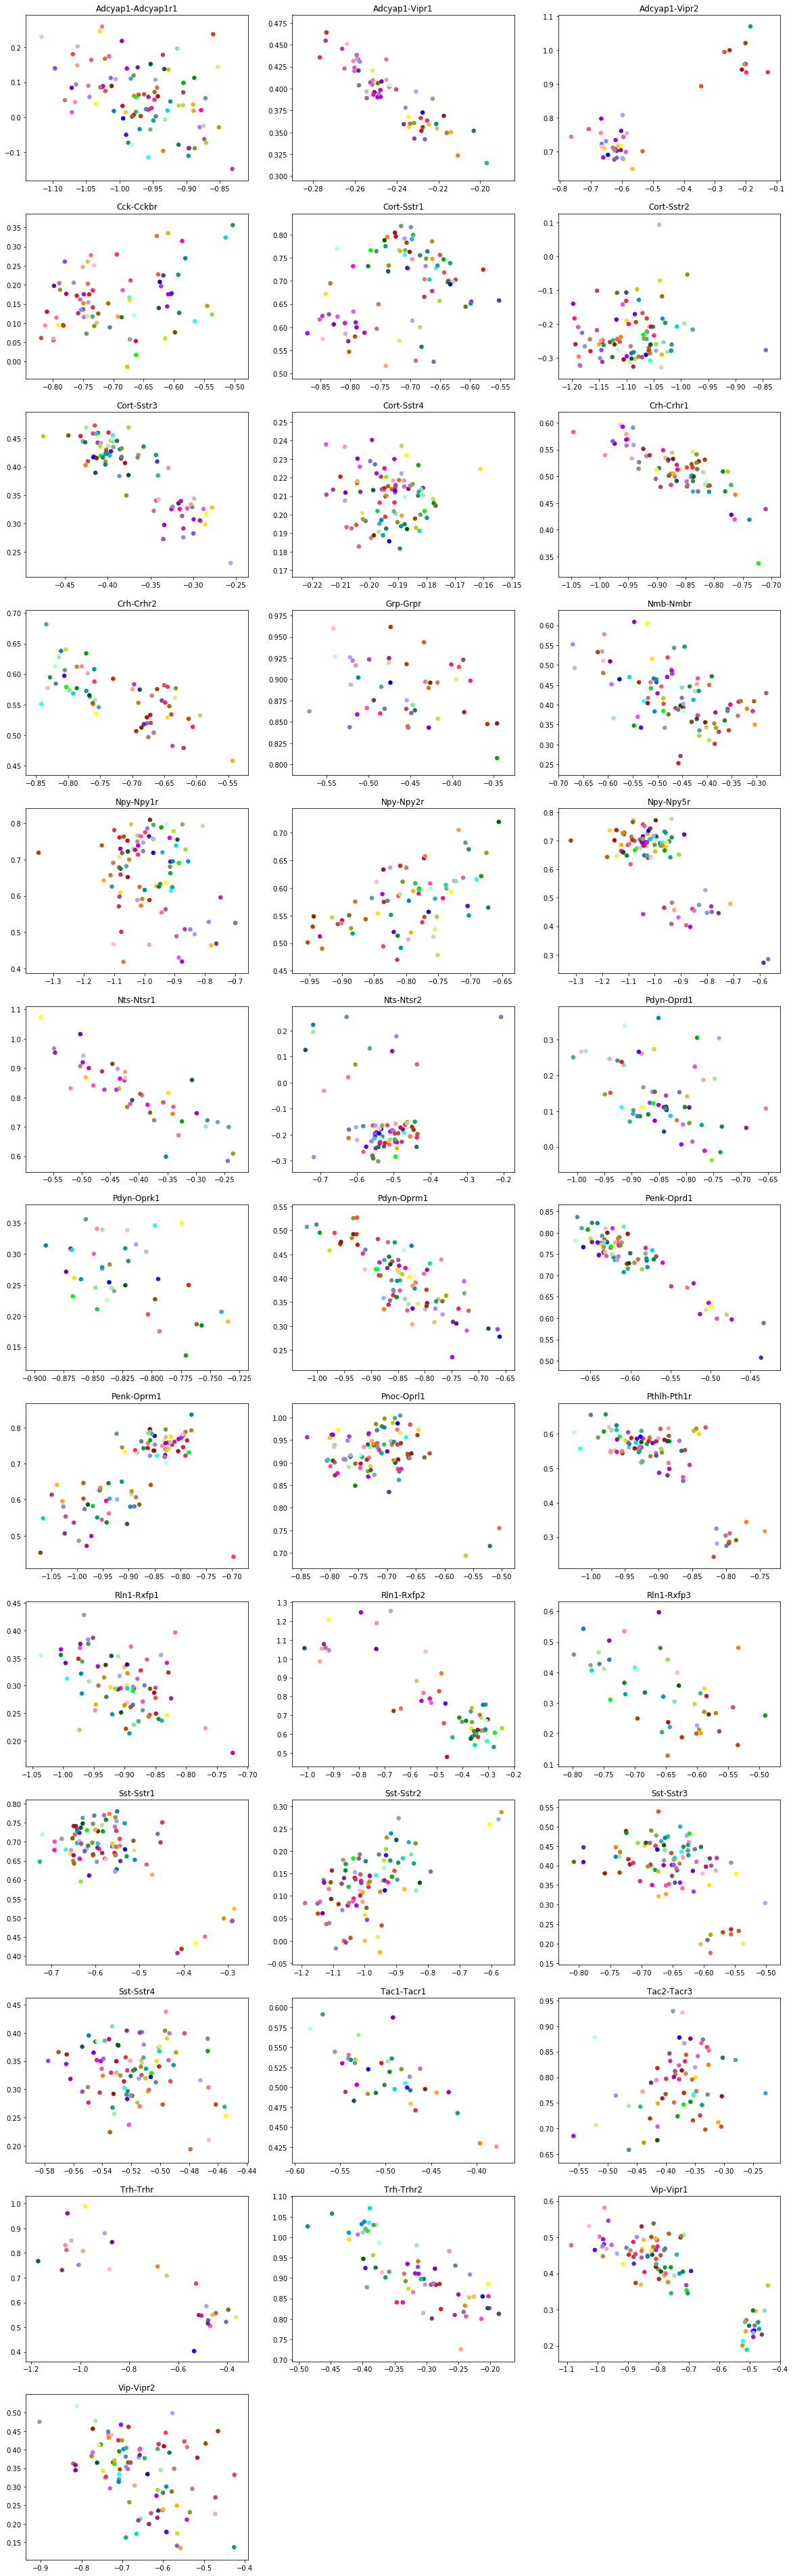

In [64]:
groups = leaf_vectors.groupby(by = "channel_id")

fig = plt.figure(figsize=(20,80))

i= 1 
for g, v in groups:
    ax = fig.add_subplot(15, 3, i)
    ax.scatter(v['d0'], v['d1'],  c= v['node_color'], s=30)
    ax.set_title(g)
    i = i + 1

plt.show()

### Plotting embeddings in 3D (1000 walks per node with length 10)

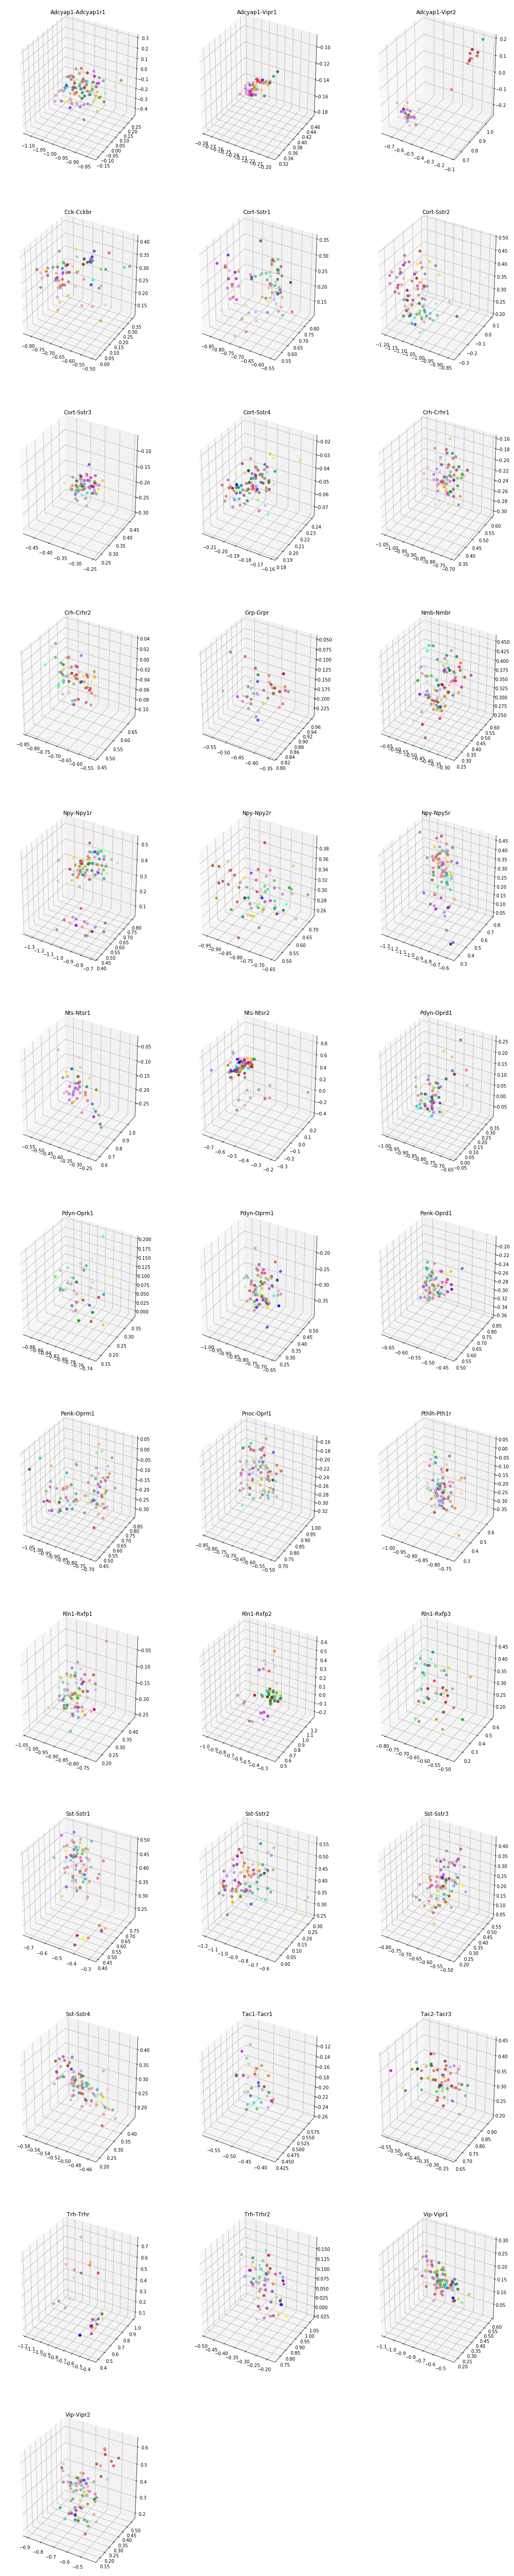

In [62]:
groups = leaf_vectors.groupby(by = "channel_id")

fig = plt.figure(figsize=(20,120))

i= 1 
for g, v in groups:
    ax = fig.add_subplot(15, 3, i, projection='3d')
    ax.scatter(v['d0'], v['d1'], v['d2'], c= v['node_color'],s=30)
    ax.set_title(g)
    i = i + 1

plt.show()